**Import Required Libraries**

In [ ]:
!pip install roboflow
!pip install ultralytics==8.0.196

**Load Dataset**

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="lWjBywj3M1I4YI09jTmu")
project = rf.workspace("road-crack-project").project("road-crack-detection-combined-dataset")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Crack-Detection-Combined-Dataset-2 in yolov5pytorch:: 100%|██████████| 3510/3510 [00:00<00:00, 4565.18it/s]


**Create Yolo V6 Object Detection Model**

In [5]:
from ultralytics import YOLO

In [9]:
# Load a model
model = YOLO('yolov6n.yaml')

activation: nn.ReLU()

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  2     18560  ultralytics.nn.modules.conv.Conv             [32, 32, 3, 1]                
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  4    147968  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 1]                
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  6    886272  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 1]              
  7                  -1  1    295424  ultralytics.nn.modules.conv

**Train the Yolo V6 Model on Road Crack Dataset**

In [10]:
# train the model
results = model.train(data = '/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml', epochs = 50)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov6n.yaml, data=/content/Road-Crack-Detection-Combined-Dataset-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

**Training Results**

In [11]:
import pandas as pd

train_results = pd.read_csv("/content/runs/detect/train2/results.csv")
train_results.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,1.8591,1.9513,1.7425,0.36832,0.42893,0.34166,0.15115,2.0296,2.0253,1.8390,0.000161,0.000161,0.000161
46,47,1.8521,1.9366,1.7536,0.46344,0.43683,0.41274,0.19283,1.9607,1.8518,1.8067,0.000136,0.000136,0.000136
47,48,1.8310,1.8992,1.7399,0.46045,0.47747,0.42656,0.20154,1.9592,1.7911,1.7899,0.000111,0.000111,0.000111
48,49,1.8257,1.8767,1.7138,0.46204,0.42892,0.40174,0.19336,1.9488,1.7613,1.7901,0.000087,0.000087,0.000087
49,50,1.8169,1.8754,1.7118,0.51476,0.42227,0.42538,0.20204,1.9504,1.7625,1.8042,0.000062,0.000062,0.000062


(-0.5, 2399.5, 1199.5, -0.5)

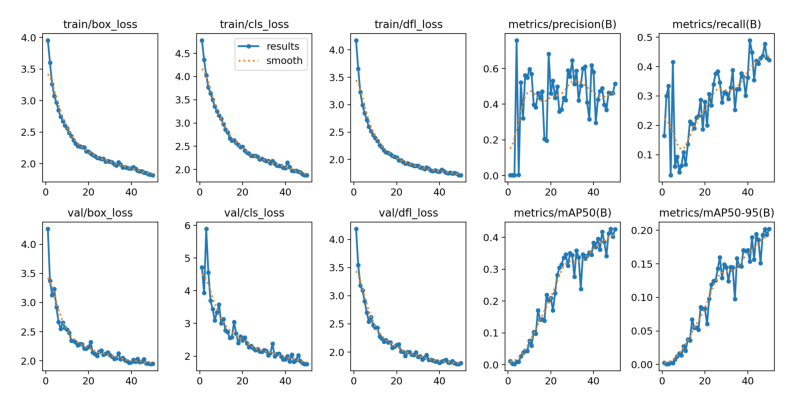

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
train_res = plt.imread("/content/runs/detect/train2/results.png")
plt.imshow(train_res)
plt.axis("off")

**R_curve**

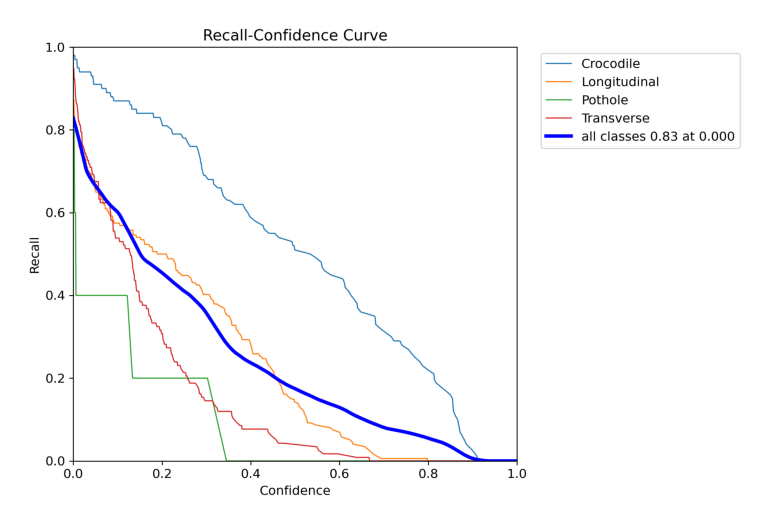

In [13]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

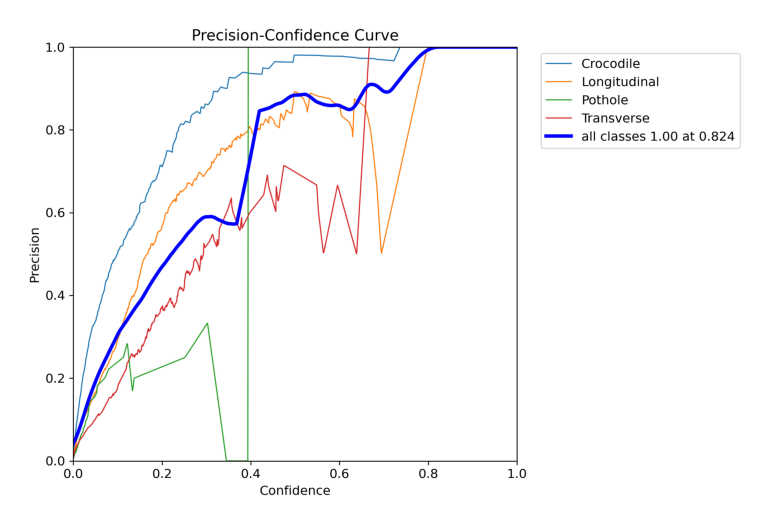

In [14]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

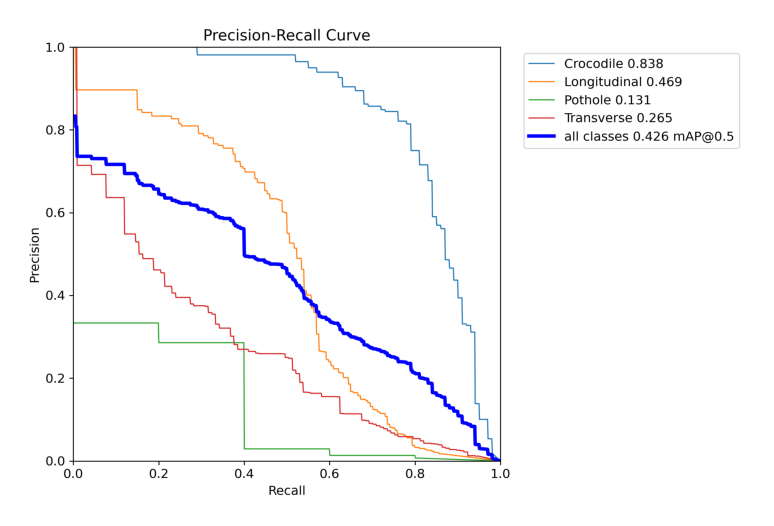

In [15]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

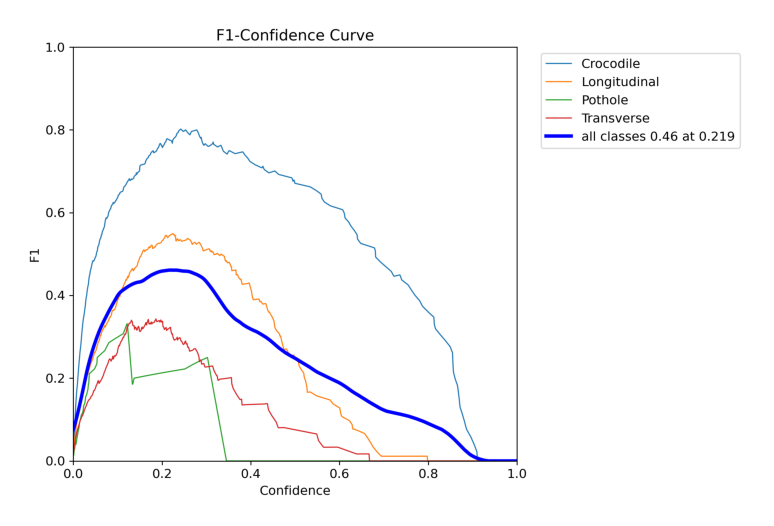

In [16]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/train2/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

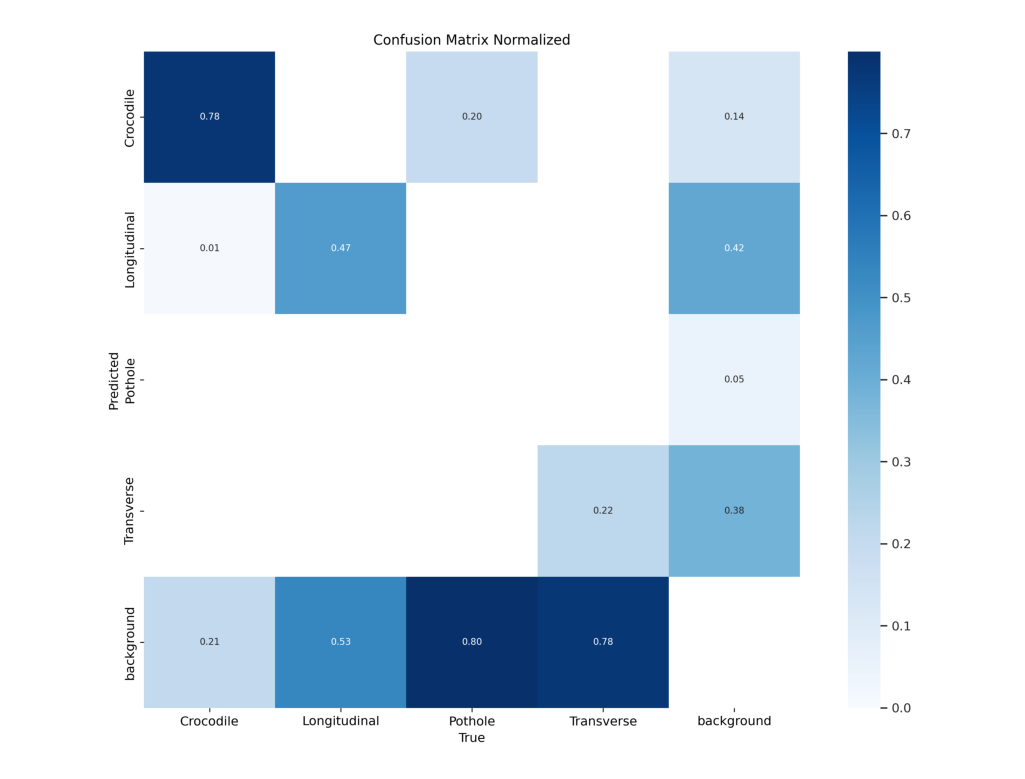

In [17]:
# Load the image
r_curve = plt.imread("/content/runs/detect/train2/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Validate results the Yolo V6 on Validation Dataset**

**R_curve**

In [18]:
model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv6n summary (fused): 142 layers, 4234140 parameters, 0 gradients, 11.8 GFLOPs
val: Scanning /content/Road-Crack-Detection-Combined-Dataset-2/valid/labels.cache... 190 images, 0 backgrounds, 0 corrupt: 100%|██████████| 190/190 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/12 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                   all        190     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb21e254a30>
fitness: 0.22397251522736472
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.46292,     0.19818,    0.060355,    0.084933])
names: {0: 'Crocodile', 1: 'Longitudinal', 2: 'Pothole', 3: 'Transverse'}
plot: True
results_dict: {'metrics/precision(B)': 0.5119795524962604, 'metrics/recall(B)': 0.422271588564692, 'metrics/mAP50(B)': 0.4253606720859511, 'metrics/mAP50-95(B)': 0.20159605335418843, 'fitness': 0.22397251522736472}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.4133751517847965, 'inference': 4.578075910869397, 'loss': 0.0012234637611790707, 'postprocess': 3.9208738427413135}

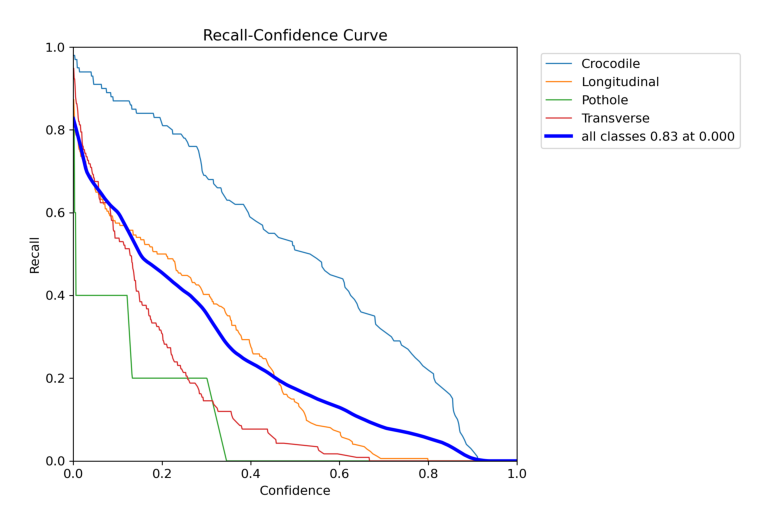

In [19]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/R_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**P-Curve**

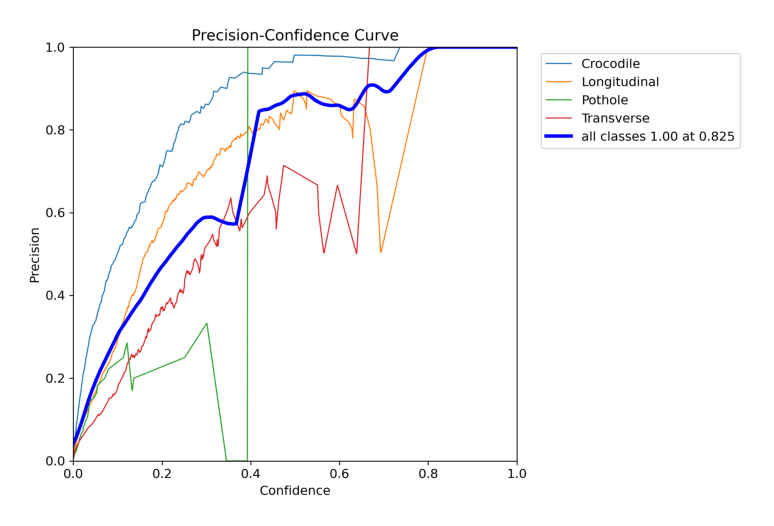

In [20]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/P_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**PR_curve**

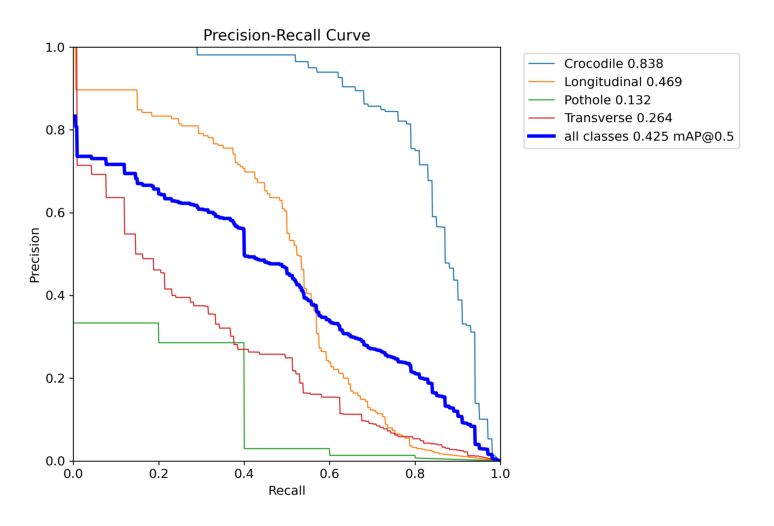

In [21]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/PR_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**F1_curve**

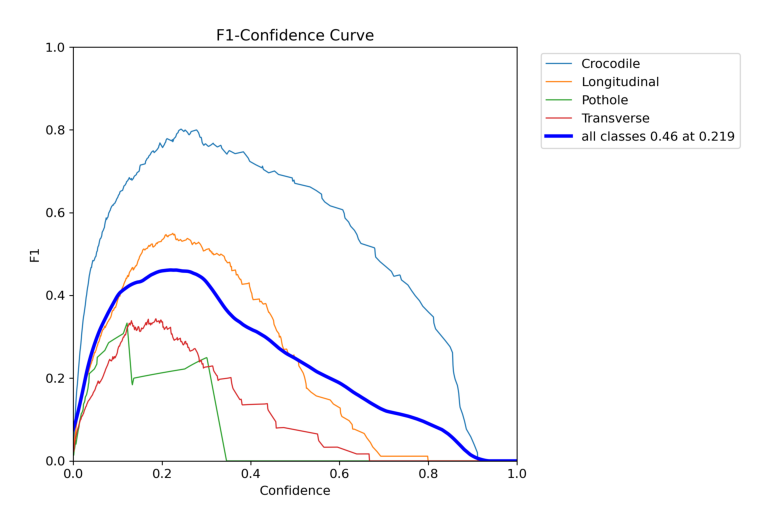

In [22]:
# Load the image
r_curve = plt.imread("/content/runs/detect/val/F1_curve.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=150)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Confusion Matrix**

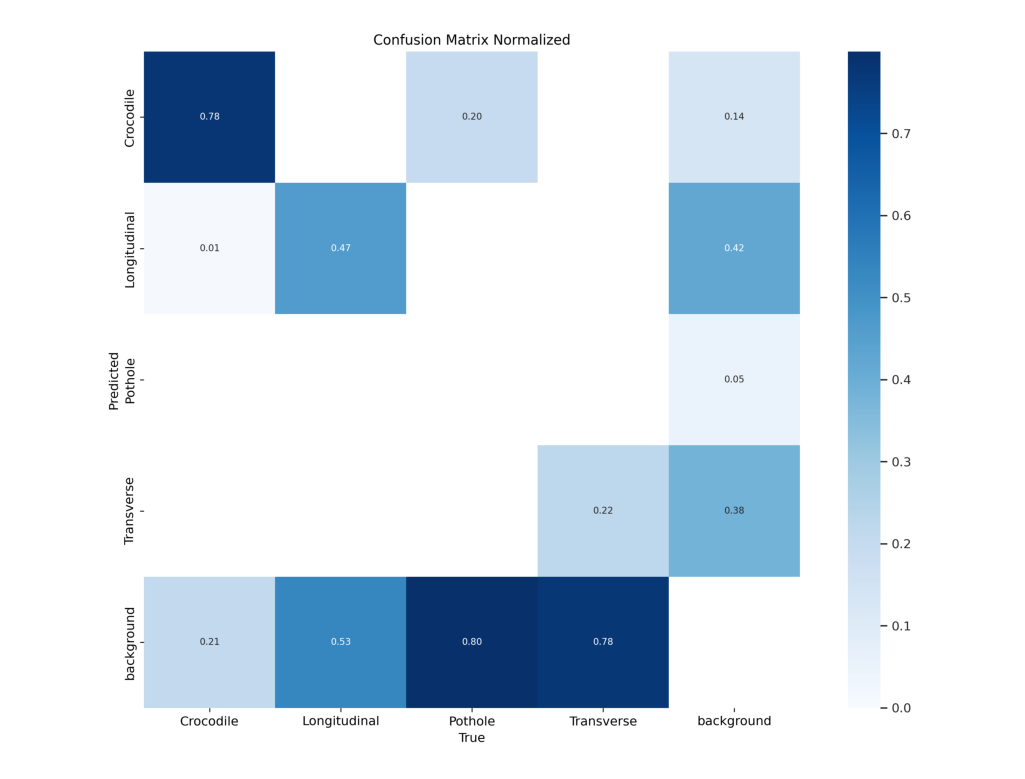

In [23]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/confusion_matrix_normalized.png")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=200)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

**Visual Results**

In [24]:
import matplotlib.pyplot as plt

# Load the image
r_curve = plt.imread("/content/runs/detect/val/val_batch1_pred.jpg")

# Create a figure with a higher DPI
fig, ax = plt.subplots(dpi=300)

# Display the image
ax.imshow(r_curve)
ax.axis("off")

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Test YOLO V5 Model on Test images**

In [25]:
# Run evaluation on the test image set
test_results = model.predict(source="/content/Road-Crack-Detection-Combined-Dataset-2/test/images", save=True)


Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
image 1/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1019---Copy_jpg.rf.97797afc733e95ac2025d1d368f58068.jpg: 384x640 1 Crocodile, 102.3ms
image 2/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1072---Copy_jpg.rf.f6fb519bb6de940f9a56f181b5325462.jpg: 384x640 2 Crocodiles, 6.0ms
image 3/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1131---Copy_jpg.rf.c3d5b11f5c4f82c71613b7e556c9356d.jpg: 384x640 (no detections), 6.0ms
image 4/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1171---Copy_jpg.rf.3dace60c37612ded87c6deb48a48cd94.jpg: 384x640 (no detections), 6.0ms
image 5/167 /content/Road-Crack-Detection-Combined-Dataset-2/test/images/frame1209---Copy_jpg.rf.a905478d978f14ef19262

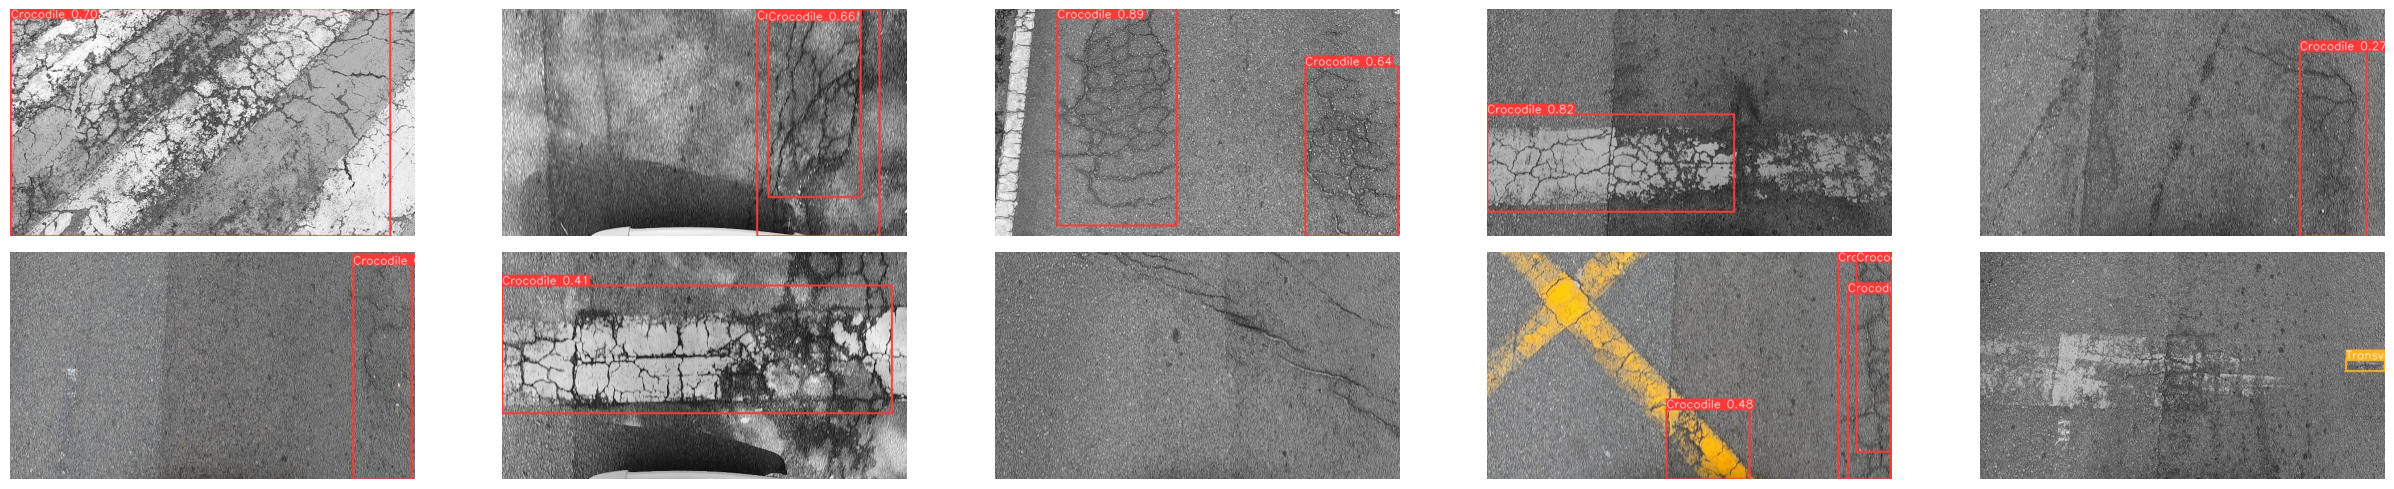

In [27]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Directory containing images
image_dir = '/content/runs/detect/predict'

# Get a list of all files in the directory
all_files = os.listdir(image_dir)

# Filter out non-image files (optional, based on common image extensions)
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp', 'tiff'))]

# Randomly select 10 images
random_images = random.sample(image_files, 10)

# Create a figure
fig, axes = plt.subplots(2, 5, figsize=(25, 5))

# Flatten axes for easy iteration
axes = axes.flatten()

for ax, img_file in zip(axes, random_images):
    # Load image
    img_path = os.path.join(image_dir, img_file)
    img = Image.open(img_path)

    # Display image
    ax.imshow(img)
    #ax.set_title(img_file)
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
